In [28]:
import pandas as pd

df = pd.read_csv("train_data.csv")  # Or use your DataFrame directly
print(df.head())


   model                  attack  \
0  human  perplexity_misspelling   
1  human  perplexity_misspelling   
2  human  perplexity_misspelling   
3  human  perplexity_misspelling   
4  human  perplexity_misspelling   

                                          generation  mean_entropy  \
0  Monday evening I did my IM injection in my thi...         527.5   
1  It’s just something I’ve been thinking about r...         603.0   
2  I'm down to about one half of my dose from a w...         642.5   
3  I have very fine but high density 2a/2b hair. ...         530.5   
4  About two weeks ago my dad had a CT scan after...         799.5   

   perplexity   mahalanobis  mc_entropy  
0       2.890  10576.863846     217.625  
1       2.898   8629.160656     136.250  
2       3.590   7739.659480     202.125  
3       2.410  13096.613757     143.125  
4       3.357  15646.024745     139.125  


In [15]:
df.attack.value_counts()

attack
article_deletion     2001
none                 2001
upper_lower          2001
number               2001
homoglyph            2001
synonym              2001
paraphrase           2001
insert_paragraphs    2001
Name: count, dtype: int64

In [31]:
df1 = df[df.attack.isin(['perplexity_misspelling','none'])]

In [32]:
df1

model                  attack  \
0      human  perplexity_misspelling   
1      human  perplexity_misspelling   
2      human  perplexity_misspelling   
3      human  perplexity_misspelling   
4      human  perplexity_misspelling   
...      ...                     ...   
23370   gpt4                    none   
23371   gpt4                    none   
23372   gpt4                    none   
23373   gpt4                    none   
23374   gpt4                    none   

                                              generation  mean_entropy  \
0      Monday evening I did my IM injection in my thi...         527.5   
1      It’s just something I’ve been thinking about r...         603.0   
2      I'm down to about one half of my dose from a w...         642.5   
3      I have very fine but high density 2a/2b hair. ...         530.5   
4      About two weeks ago my dad had a CT scan after...         799.5   
...                                                  ...           ...   
23370  In my opinion, private schools are an obstacle...         744.0   
23371  I've noticed a trend recently where players se...        1277.0   
23372  After my last psychedelic trip, I was left wit...         488.2   
23373  I've been experimenting with different strateg...         834.5   
23374  I just wanted to take a moment to express my g...         914.0   

       perplexity   mahalanobis  mc_entropy  
0           2.890  10576.863846     217.625  
1           2.898   8629.160656     136.250  
2           3.590   7739.659480     202.125  
3           2.410  13096.613757     143.125  
4           3.357  15646.024745     139.125  
...           ...           ...         ...  
23370       2.338  11020.642947     351.500  
23371       3.125  12789.783069     193.250  
23372       1.667  10902.440687     228.000  
23373       2.018  15105.031620     186.500  
23374       2.016  12025.554260     107.250  

[4002 rows x 7 columns]

In [25]:
df = df.drop(df[df.attack == 'perplexity_misspelling'].index)
df = df.drop(df[df.attack == 'zero_width_space'].index)
df = df.drop(df[df.attack == 'alternative_spelling'].index)
df = df.drop(df[df.attack == 'whitespace'].index)
df = df.drop(df[df.attack == 'upper_lower'].index)

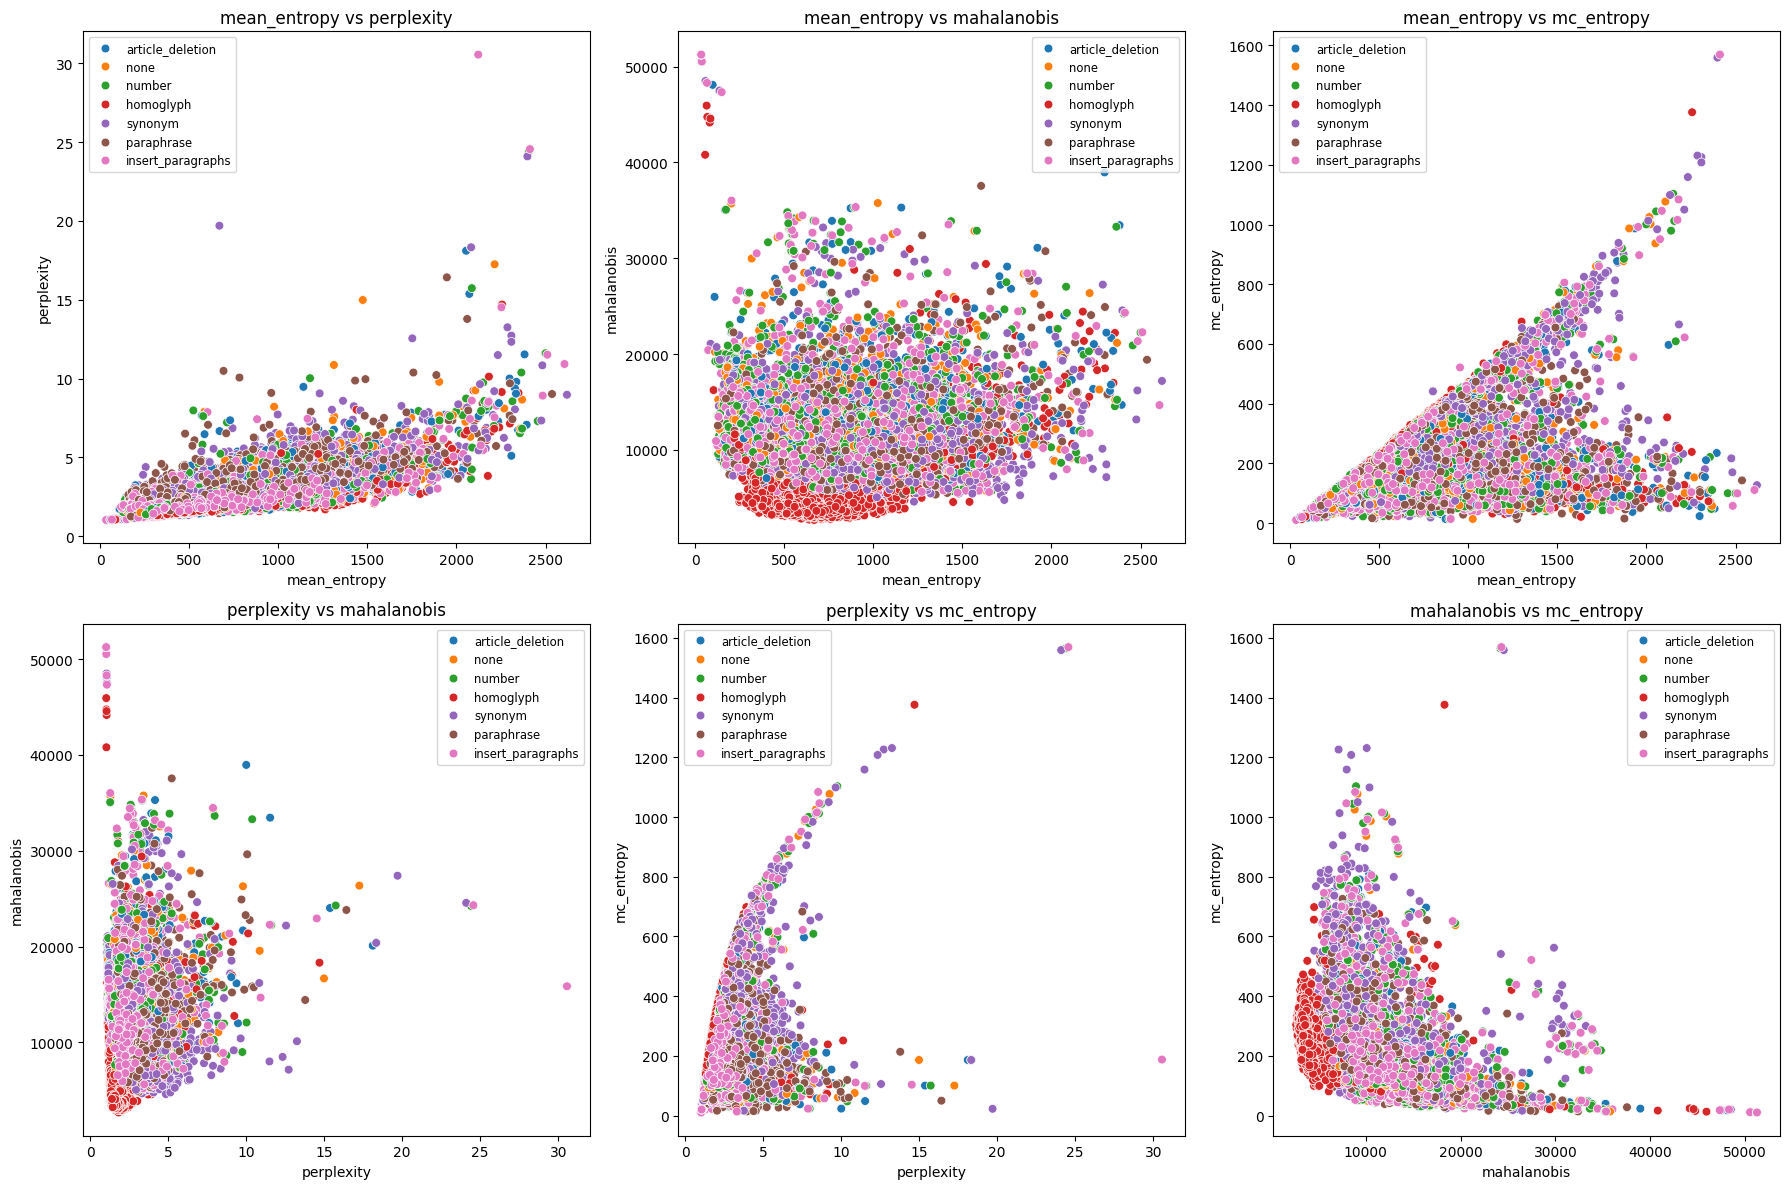

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Feature columns to visualize
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']

# Create all pairwise combinations
pairs = list(combinations(features, 2))

# Plot
plt.figure(figsize=(18, 12))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=x, y=y, hue='attack', palette='tab10', s=40)
    plt.title(f'{x} vs {y}')
    plt.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.show()


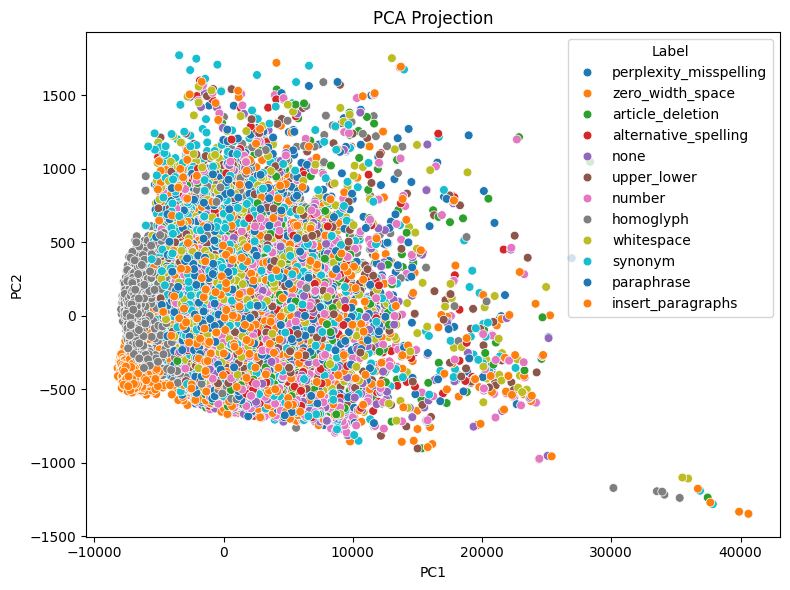

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


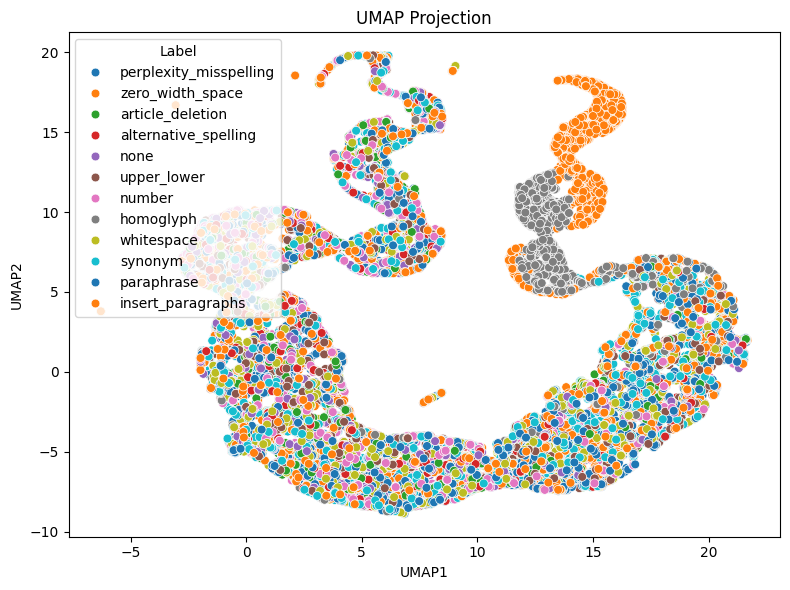

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap.umap_ as umap

features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df[features].values
y = df['attack']

# ---------- PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=40)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# ---------- UMAP ----------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10', s=40)
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


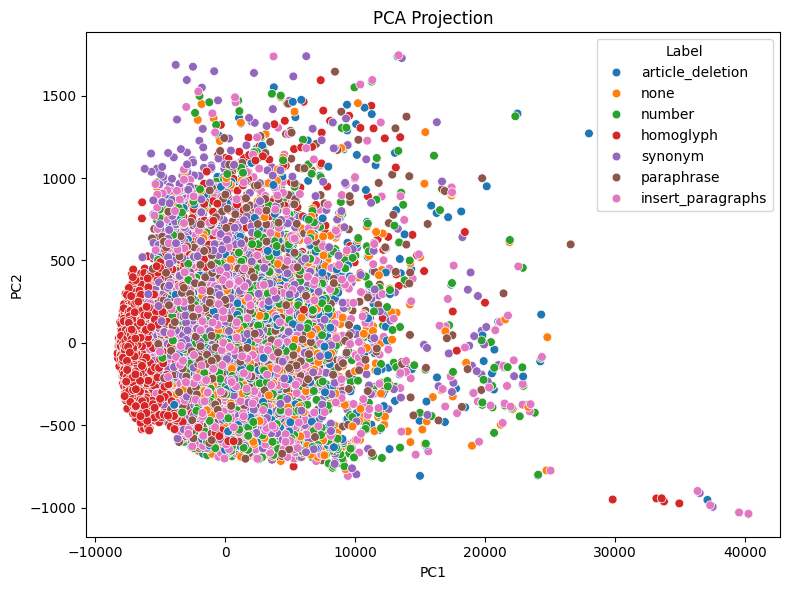

In [26]:

features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df[features].values
y = df['attack']

# ---------- PCA ----------
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=40)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


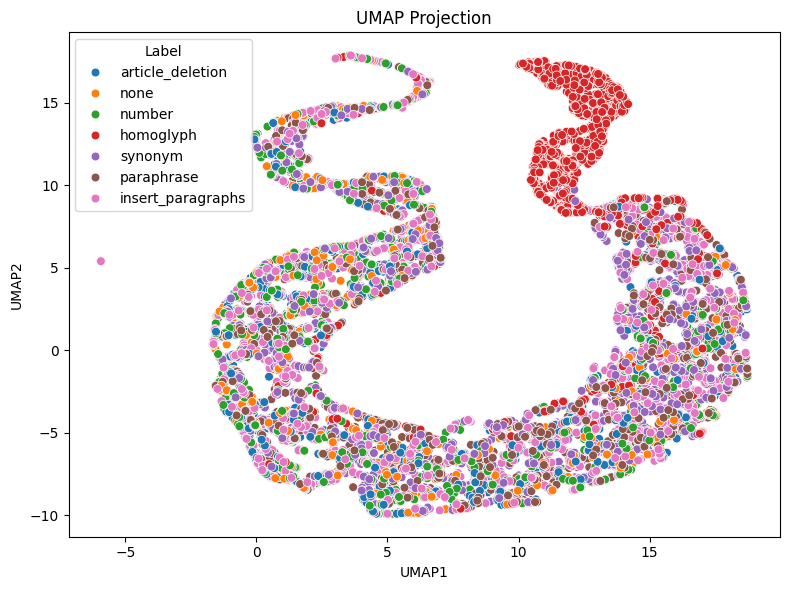

In [27]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10', s=40)
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Label')
plt.tight_layout()
plt.savefig('umap_all.png')
plt.show()

# 'perplexity_misspelling' VS 'none'

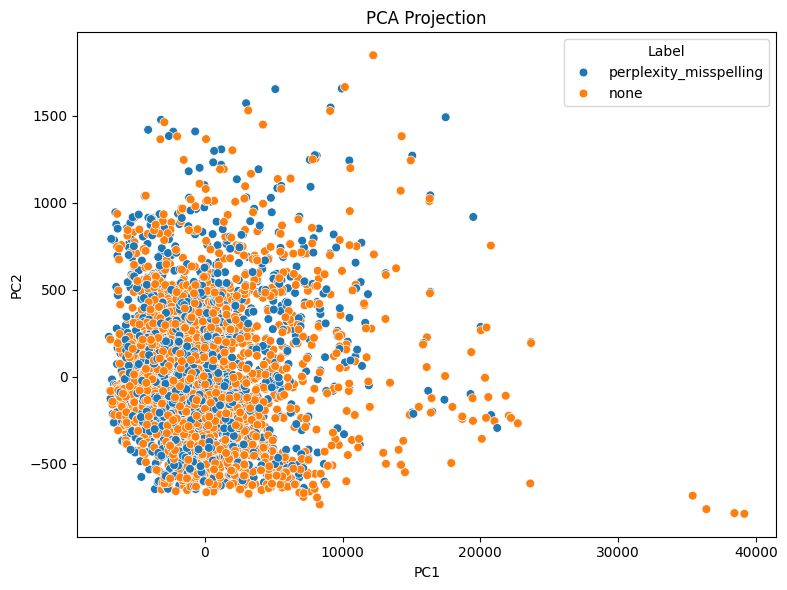

In [34]:
df1 = df[df.attack.isin(['perplexity_misspelling','none'])]


features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

# ---------- PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=40)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


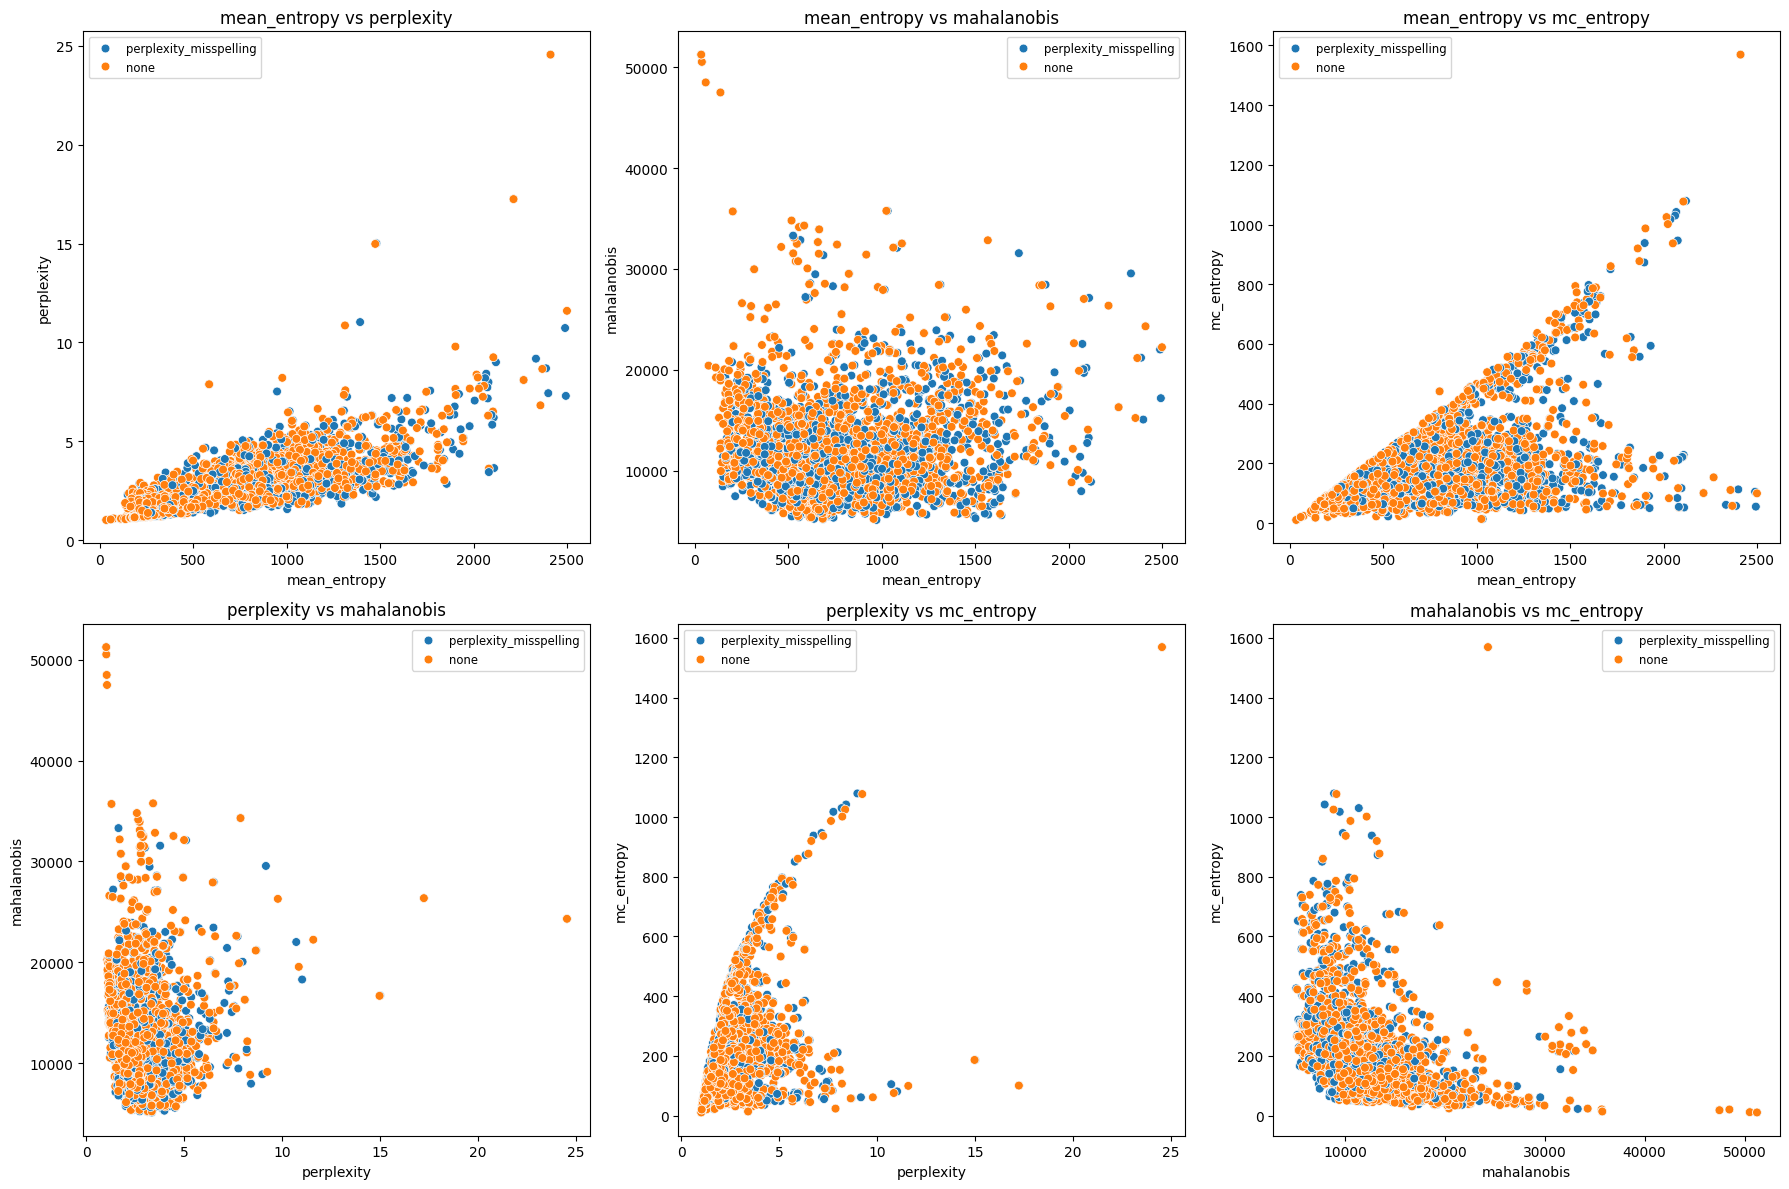

In [36]:
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']

# Create all pairwise combinations
pairs = list(combinations(features, 2))

# Plot
plt.figure(figsize=(18, 12))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df1, x=x, y=y, hue='attack', palette='tab10', s=40)
    plt.title(f'{x} vs {y}')
    plt.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


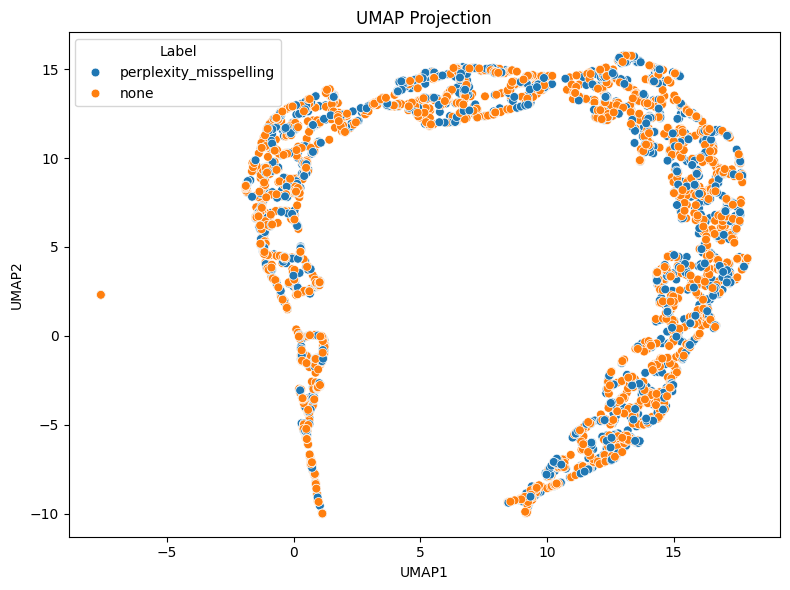

In [42]:
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10', s=40)
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Label')
plt.tight_layout()
plt.savefig('umap_perplexity.png')
plt.show()

# 'article_deletion' VS 'none'

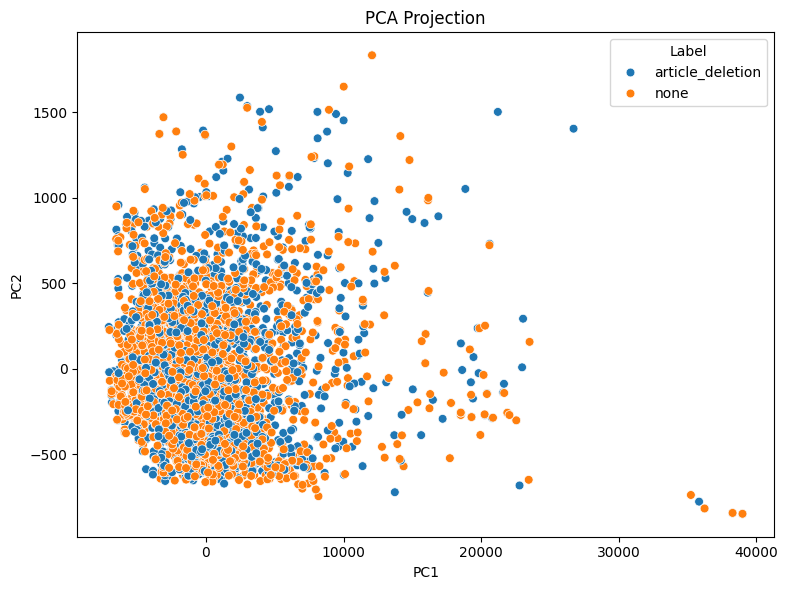

In [45]:
df1 = df[df.attack.isin(['article_deletion','none'])]


features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

# ---------- PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=40)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


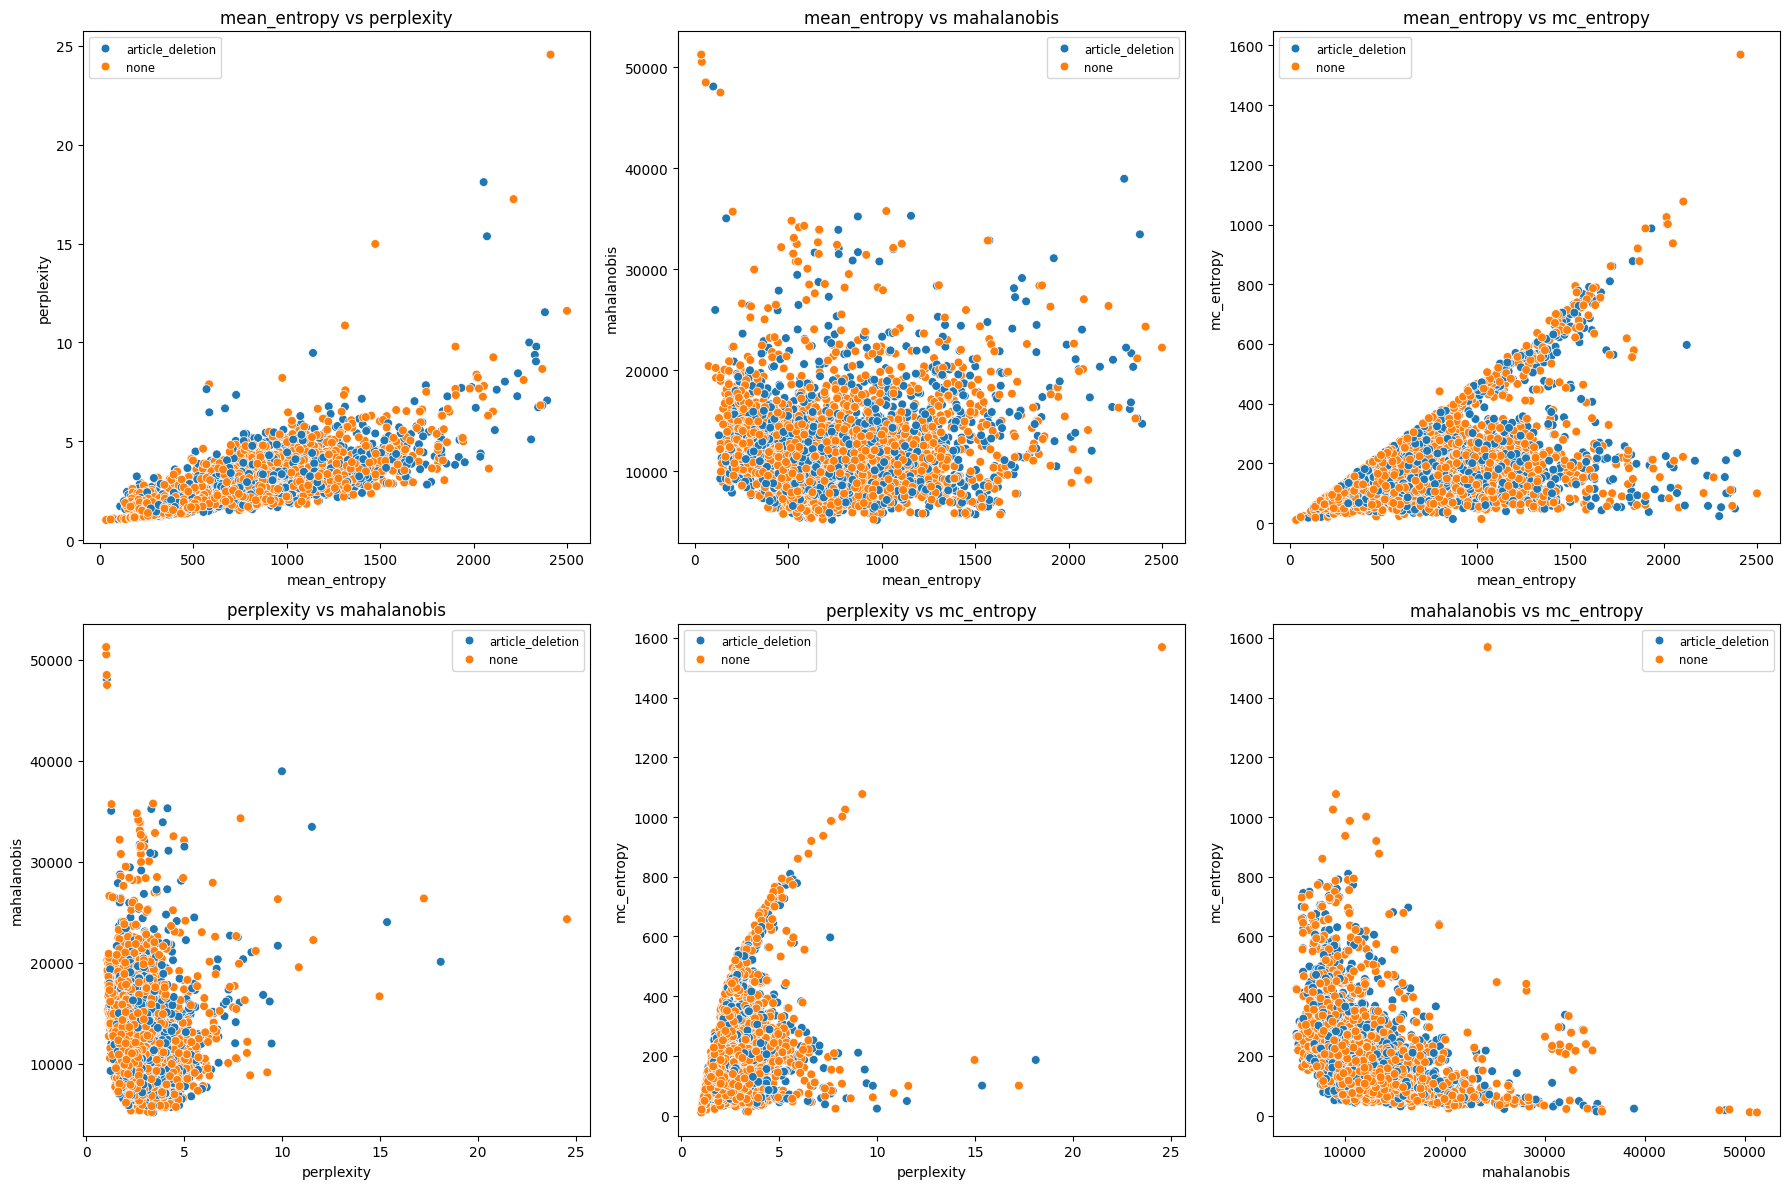

In [46]:
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']

# Create all pairwise combinations
pairs = list(combinations(features, 2))

# Plot
plt.figure(figsize=(18, 12))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df1, x=x, y=y, hue='attack', palette='tab10', s=40)
    plt.title(f'{x} vs {y}')
    plt.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


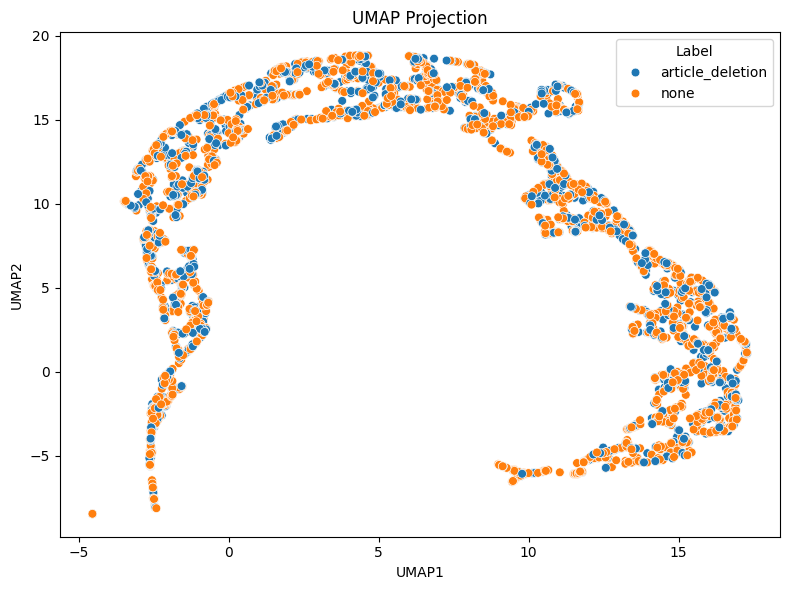

In [47]:
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10', s=40)
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Label')
plt.tight_layout()
plt.savefig('umap_article.png')
plt.show()

# 'upper_lower' VS 'none'

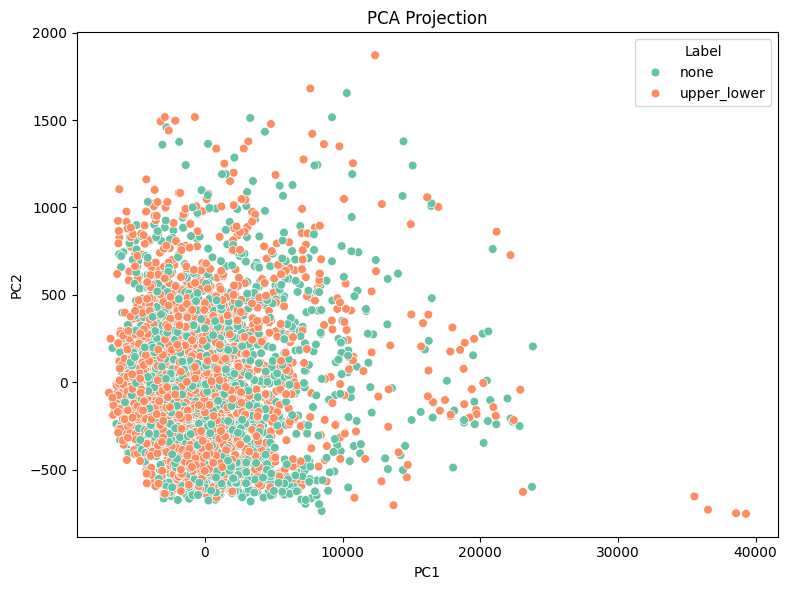

In [50]:
df1 = df[df.attack.isin(['upper_lower','none'])]


features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

# ---------- PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', s=40)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


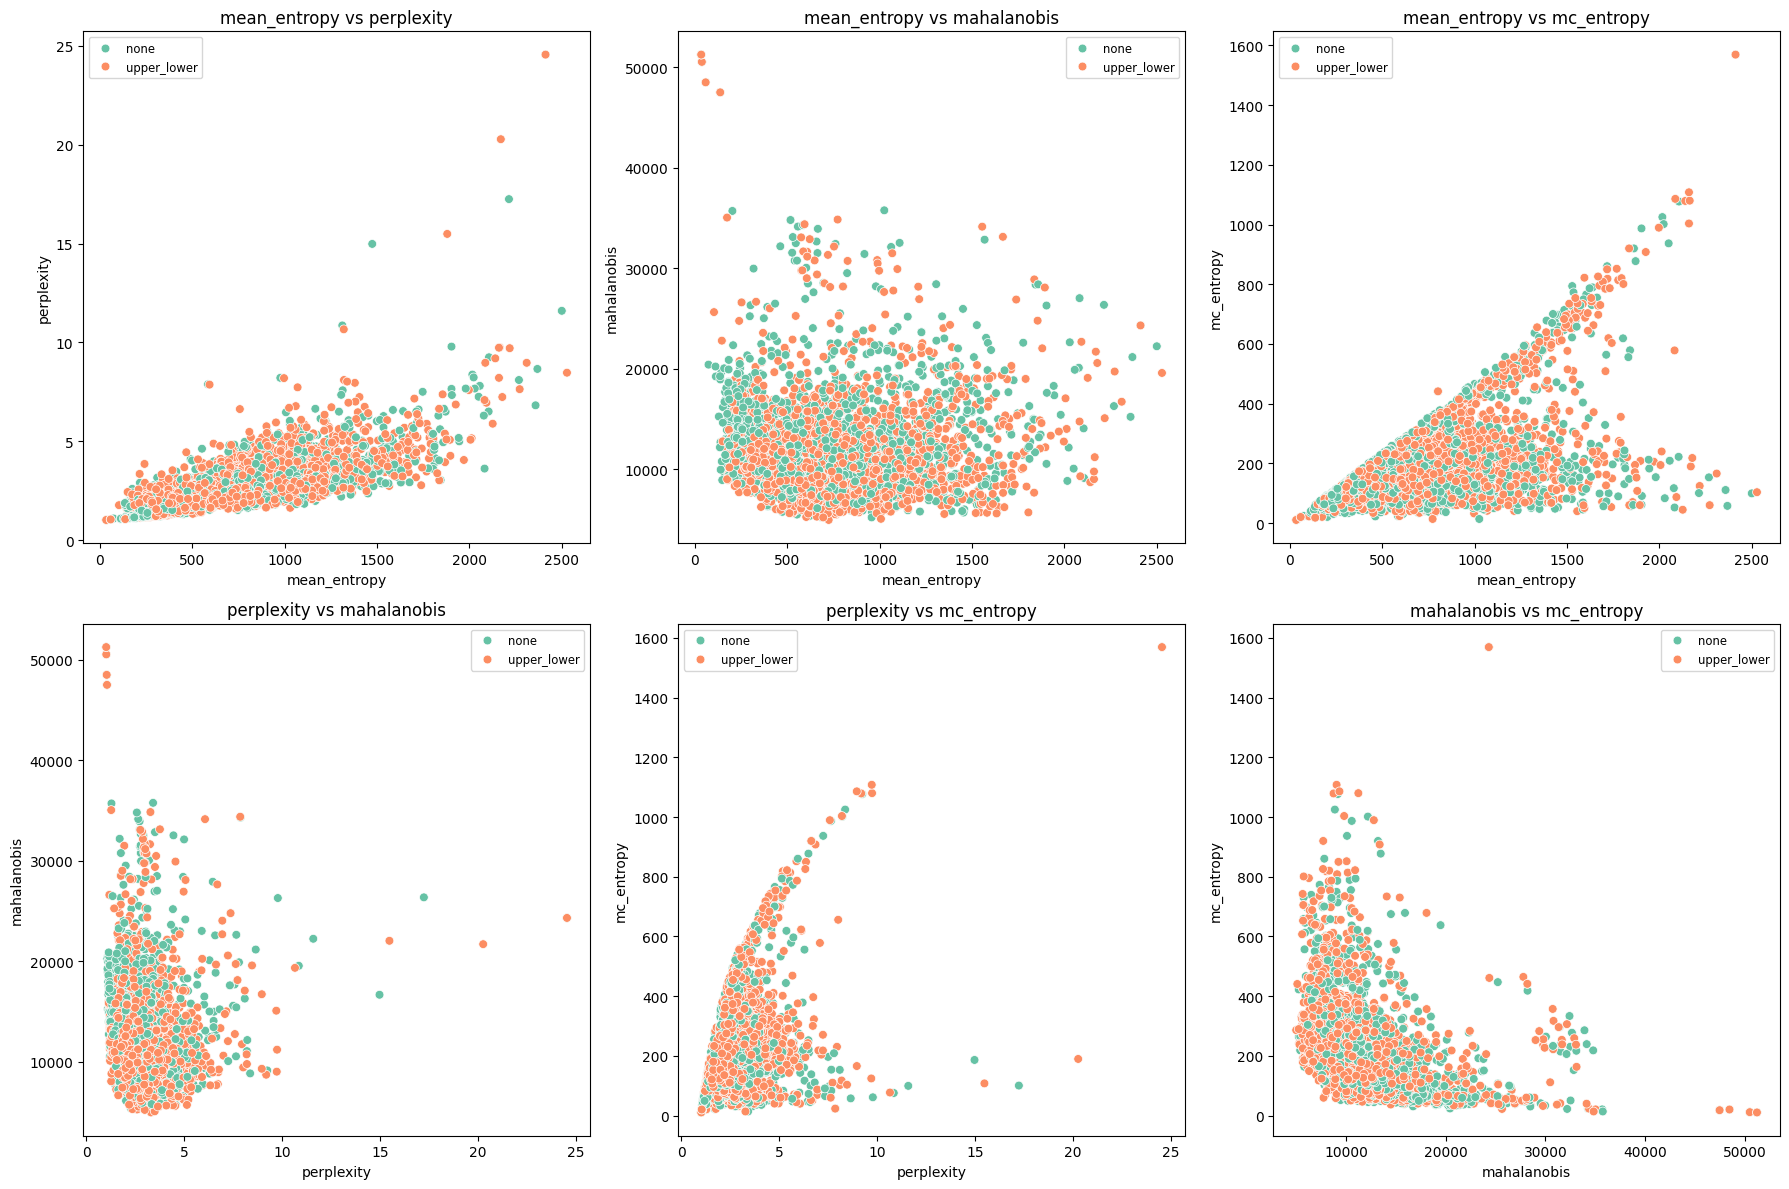

In [51]:
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']

pairs = list(combinations(features, 2))

# Plot
plt.figure(figsize=(18, 12))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df1, x=x, y=y, hue='attack', palette='Set2', s=40)
    plt.title(f'{x} vs {y}')
    plt.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


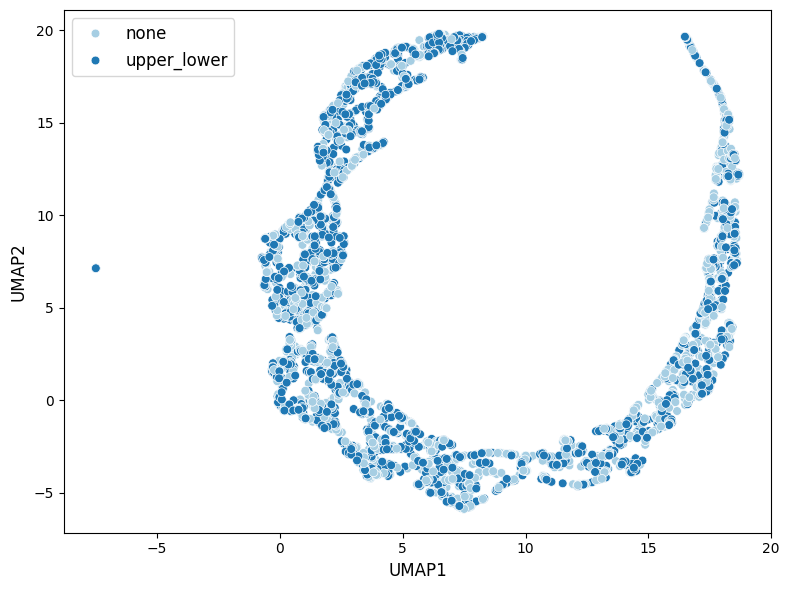

In [75]:
df1 = df[df.attack.isin(['upper_lower','none'])]

features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='Paired', s=40)
# plt.title('UMAP Projection')
plt.xlabel('UMAP1',fontsize=12)
plt.ylabel('UMAP2', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('umap_upper_lower.png')
plt.show()

# 'number' VS 'none'

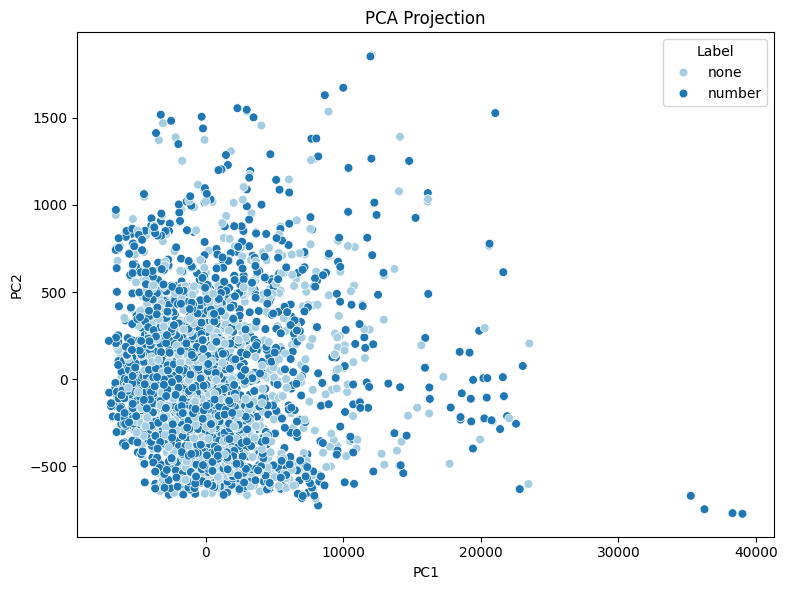

In [63]:
df1 = df[df.attack.isin(['number','none'])]


features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

# ---------- PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Paired', s=40)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


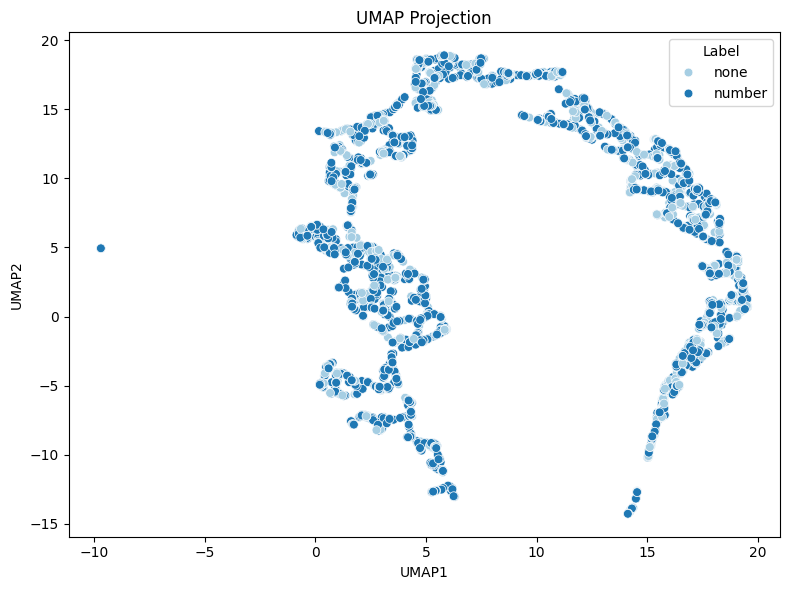

In [65]:
df1 = df[df.attack.isin(['number','none'])]
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='Paired', s=40)
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Label')
plt.tight_layout()
plt.savefig('umap_number.png')
plt.show()

In [ ]:
homoglyph            2001
synonym              2001
paraphrase           2001
insert_paragraphs    2001

# 'insert' VS 'none'

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


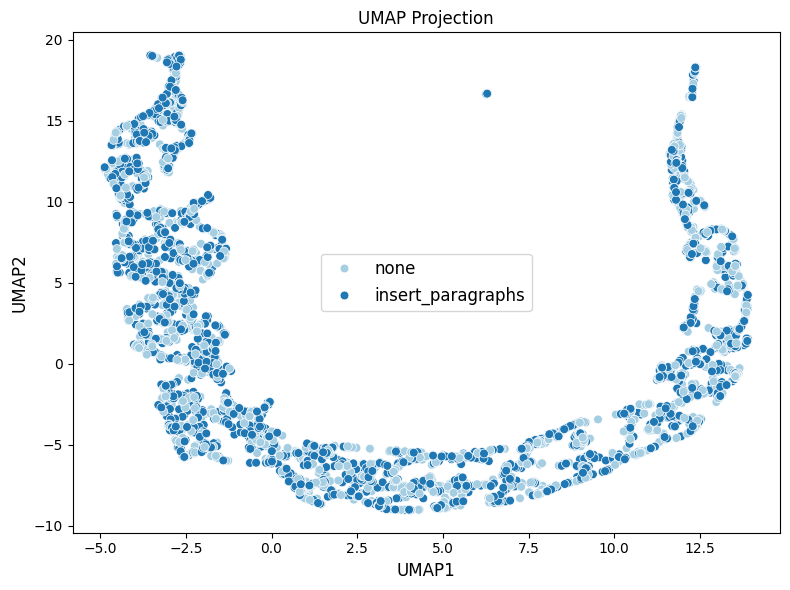

In [76]:
attack = 'insert_paragraphs'
df1 = df[df.attack.isin([attack,'none'])]
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='Paired', s=40)
# plt.title('UMAP Projection',fontsize=12)
plt.xlabel('UMAP1',fontsize=12)
plt.ylabel('UMAP2', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f'umap_{attack}.png')
plt.show()

# 'homoglyph' VS 'none'

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


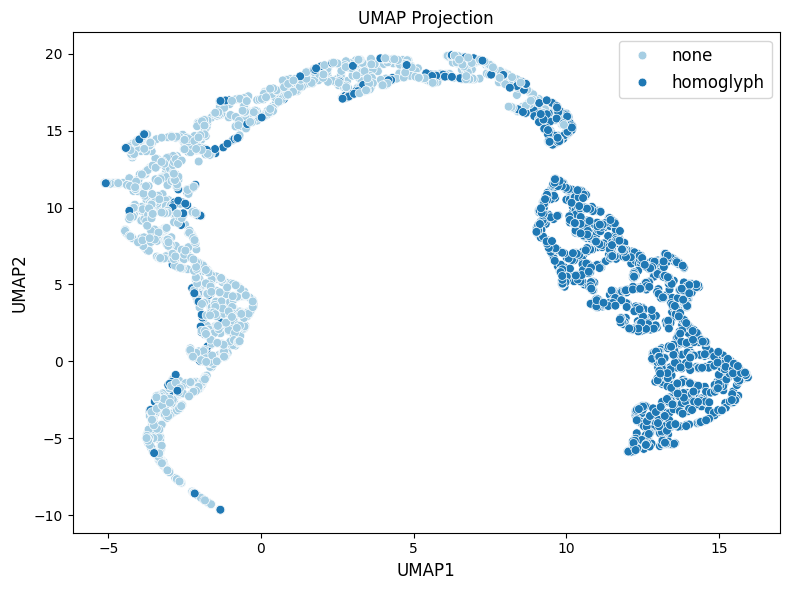

In [77]:
attack = 'homoglyph'
df1 = df[df.attack.isin([attack,'none'])]
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='Paired', s=40)
plt.title('UMAP Projection',fontsize=12)
plt.xlabel('UMAP1',fontsize=12)
plt.ylabel('UMAP2', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f'umap_{attack}.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


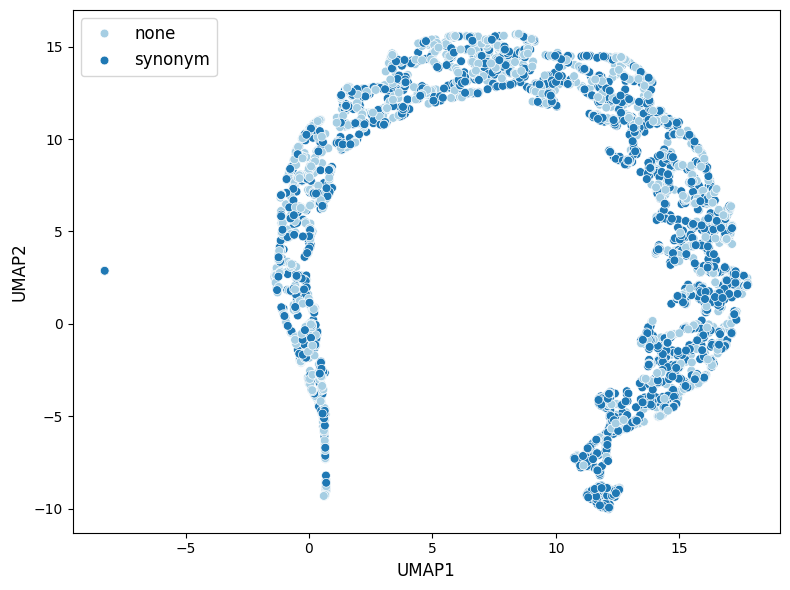

In [78]:
attack = 'synonym'
df1 = df[df.attack.isin([attack,'none'])]
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='Paired', s=40)
# plt.title('UMAP Projection',fontsize=12)
plt.xlabel('UMAP1',fontsize=12)
plt.ylabel('UMAP2', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f'umap_{attack}.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


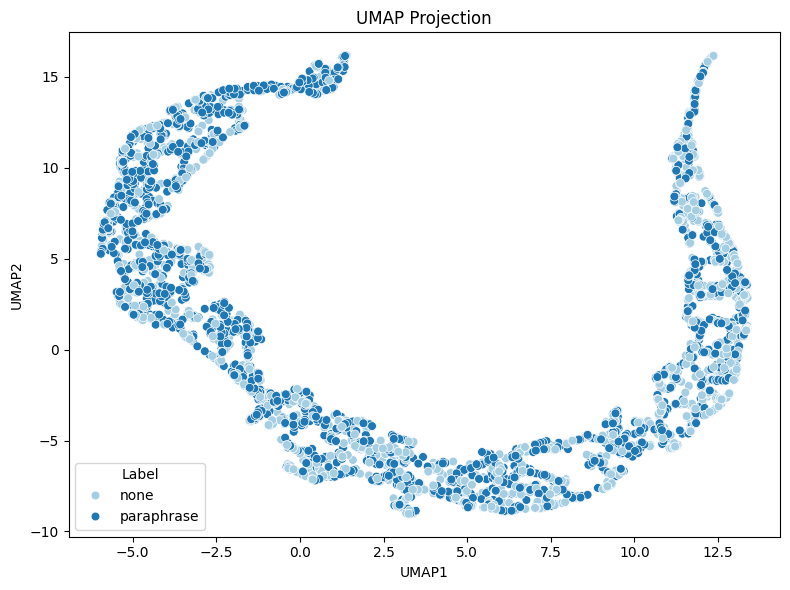

In [72]:
attack = 'paraphrase'

df1 = df[df.attack.isin([attack,'none'])]
features = ['mean_entropy', 'perplexity', 'mahalanobis', 'mc_entropy']
X = df1[features].values
y = df1['attack']

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='Paired', s=40)
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Label')
plt.tight_layout()
plt.savefig(f'umap_{attack}.png')
plt.show()